url : https://kaggle.com/datasets/andreylovyagin/online-unfair-casino            
downlaod : https://www.kaggle.com/datasets/andreylovyagin/online-unfair-casino/download?datasetVersionNumber=3

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [138]:
data = pd.read_csv('/kaggle/input/online-unfair-casino/onlineCasino.csv')

In [139]:
data

,ID,gamers,skins,money,ticks,peopleWin,peopleLost,outpay,time,moderator
0,2091103,144,174,283.57000,14.30,125.459984,0.250000,408.780000,2021-08-25 16:43,False
1,2091104,134,182,279.30000,1.14,5.810003,177.040000,108.070010,2021-08-25 16:44,False
2,2091105,139,179,282.87000,3.91,125.010000,5.960000,401.919920,2021-08-25 16:44,False
3,2091106,139,169,271.44000,1.15,6.900001,181.850000,96.490005,2021-08-25 16:45,False
4,2091107,142,177,304.88000,1.00,0.000000,304.880000,0.000000,2021-08-25 16:45,False
...,...,...,...,...,...,...,...,...,...,...
55570,2146673,114,146,246.68002,1.74,46.410004,36.400000,226.020020,2021-09-14 22:01,False
55571,2146674,106,131,190.87997,2.35,49.629974,14.489999,156.730010,2021-09-14 22:02,False
55572,2146675,110,138,209.81992,1.40,23.020000,76.109985,219.819980,2021-09-14 22:02,False
55573,2146676,101,128,165.06999,5.76,56.540000,1.790000,202.730030,2021-09-14 22:03,False


In [140]:
data.isnull().sum()

ID             0
gamers         0
skins          0
money          0
ticks          0
peopleWin      0
peopleLost     0
outpay         0
time          10
moderator      0
dtype: int64

In [141]:
data['moderator'] = data['moderator'].astype(np.int)

/tmp/ipykernel_32/866546293.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [142]:
data = data.dropna(axis=0)

In [143]:
data = data.drop('ID',axis=1)

In [144]:
data['Month'] = data['time'].apply(lambda x: x[5:7]).astype(np.int)
data['Month'] = data['Month'].apply(lambda x: 0 if x==8 else 1)
data['Day'] = data['time'].apply(lambda x: x[8:10]).astype(np.int)
data = data.drop('time',axis=1)

/tmp/ipykernel_32/600323578.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/tmp/ipykernel_32/600323578.py:3: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://nu

<Axes: >

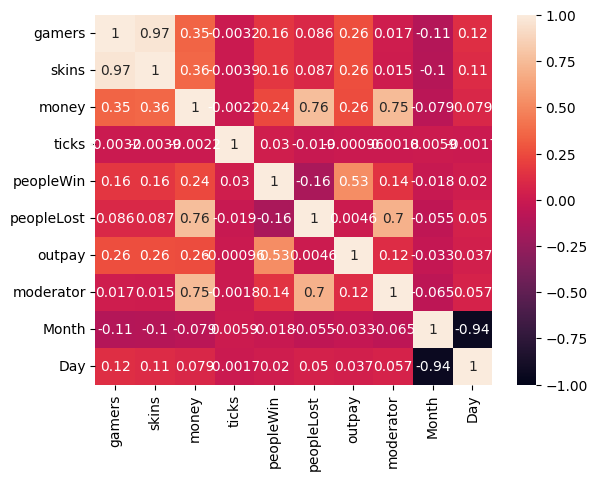

In [145]:
sns.heatmap(data.corr(),vmax=1.0,vmin=-1.0,annot=True)

In [146]:
data['ticks'] = data['ticks'].apply(lambda x: 0 if x < 2 else 1)

In [147]:
y = data['ticks']
x = data.drop('ticks',axis=1)

In [148]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [149]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.70,random_state=7)

In [150]:
model = MLPClassifier(hidden_layer_sizes=(64,64))
model.fit(x_train,y_train)
model.score(x_test , y_test)

0.9725254949010198

In [152]:
y_pred = model.predict(x_test)

f1_score(y_pred,y_test)

0.9720663576482069

In [157]:
(y_pred == y_test).sum() / len(y_test)

0.9725254949010198

### Thank you so much for watching 
##### **i hope you enjoy:)**